# Dataset Loading from previous stage

### Constants

In [ ]:
data_read_path = '/content/drive/MyDrive/CombinedData.csv'
data_clean_path='/content/drive/MyDrive/CombinedDataCleaned.csv'
data_nlped_path='/content/drive/MyDrive/CombinedDataNLPed.csv'


## Import Libraries
---
lets start by importing the nessacary libraries

#### insatll stanza

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 37.0 MB/s eta 0:00:00


### import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import emoji
import contractions
import re
import random
#from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive
from textblob import TextBlob


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import stanza
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


### Download packages

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

## Loading the dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data_clean_path)

In [ ]:
df['statement'][37456]

'an easter egg without the calories'

In [ ]:
df.fillna('',inplace=True)

In [ ]:
df.isna().sum()

,0
statement,0
status,0
statemnent_length,0
num_of_words,0
num_of_sentences,0
statement_with_emojis,0
tokens,0
tokens_stemmed,0
tokens_verbs,0
tokens_nouns,0


# ***🦖 NLP Pre-Processing***



## what we will do


---

in this part of the ml pipeline, we perform several essential NLP preprocessing steps to prepare our data for machine learning. These steps include:

  1. **Text Processing:**
      * include :
        - pattern reomving (links,emails and etc.)
        - lower casing
        - stop words removing

  2. **tokinezation & Stemming :**

     *  Tokenization :  
        - this step converts each text sample into an array of tokens (individual words or sub-words).
        -  we use Stanza word tokenizer to ensure precise, language-specific tokenization.
     * Stemming :
        
        - in this step, we transform each tokenized array into a stemmed version, reducing each word to its base or root form.
        - stanza NLP tools allow us to use various stemming techniques for extracting meaningful root words.
  

  3. **Part-of-Speech (POS) Tagging and Filtering**:

  - sing Stanza, we apply POS tagging to identify and filter specific parts of speech, such as:
       - **Verbs**: Identify and include only verbs to capture action-related semantics.
       - **Nouns**: Extract nouns to focus on entity- or object-based information.
       - **Adjectives**: Include adjectives to analyze descriptive language and sentiment.
  - This POS filtering allows us to tailor the input data by emphasizing different linguistic elements and can be customized based on the classification or NLP goals.



## 1. Text Processing:

#### How the sentences frequency is ?

In [ ]:
# Calculate the number of sentences for each statement
df['num_of_sentences'] = df['statement'].apply(lambda text : len(nltk.sent_tokenize(text)))

bar chart for the num f scentences and its frequency

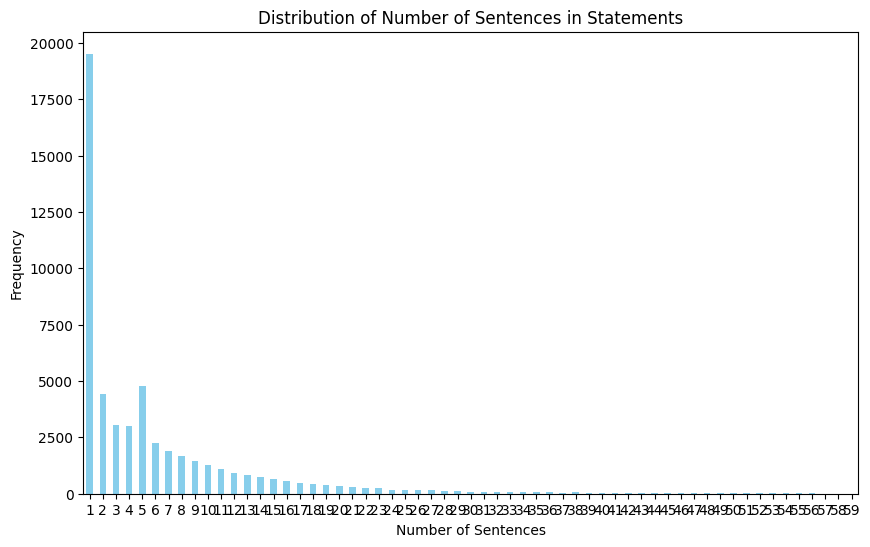

In [ ]:
# Plot distribution of the number of sentences\n",
plt.figure(figsize=(10, 6))

df[df['num_of_sentences'] <60 ]['num_of_sentences'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.title('Distribution of Number of Sentences in Statements')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


### 1.1 Lower casing

In [ ]:
df.sample(1)

,statement,status,statemnent_length,num_of_words,num_of_sentences
26087,I am 21 years old and there is no hope for me....,Suicidal,1180,228,14


In [ ]:
df['statement']=df['statement'].str.lower()
df.sample(1)

,statement,status,statemnent_length,num_of_words,num_of_sentences
8197,i love sleep it is like a teaser trailer for d...,Depression,526,105,5


### 1.2 Special Patterns Removing

 here we define our function to remoe the speacial paterns which is  :  
 1. links
 2. emails
 3. markdown text
 4. handles
 5. puctuation

In [ ]:
def remove_patterns(text):

    # remove URL's
    text = re.sub(r'http[s]?://\S+', '', text)

    # remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)

    # remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()


aplying the special patterns removing

In [ ]:
# apply the function to the statements
df['statement'] = df['statement'].apply(remove_patterns)

### 1.3 Remove Stop words

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

In [ ]:
# df['statement'] = df['statement'].apply(remove_stopwords)

### 1.4 Emoji-features Extractions

#### Convert smiles to words

In [ ]:
# Define the emoticon map with patterns and corresponding labels
emoticon_map = {
    r':\)+': 'happy_face',
    r':D+': 'very_happy_face',
    r':\(+': 'sad_face',
    r':\'\(+': 'crying_face',
    r';\)+': 'winking_face',
    r':O': 'surprised_face',
    r'>:\(+': 'angry_face',
    r':\|': 'neutral_face',
    r'<3': 'heart',
    r'B-\)+': 'cool_face'
}

In [ ]:
# Function to convert emojis and emoticons to descriptive text
def convert_emojis(text):

    for emoticon, replacement in emoticon_map.items():
        text = re.sub(emoticon, replacement, text)
    text = emoji.demojize(text, delimiters=("", ""))
    return text


text of emojies only

In [ ]:
# Function to extract emoticons and replace with descriptive labels
def extract_emojis(text):
    emoji_labels = []
    for pattern, label in emoticon_map.items():
        matches = re.findall(pattern, text)
        emoji_labels.extend([label] * len(matches))  # Add label for each matched emoticon
    return ' '.join(emoji_labels)  # Join labels into a single string


apply the emoji converter

In [ ]:
# Apply emoji conversion to the 'statement' column
df['statement_with_emojis'] = df['statement'].apply(convert_emojis)
df['statement'] = df['statement'].apply(convert_emojis)



#### emojies bar chart

In [ ]:
from collections import Counter

# Split the emoji labels into individual words and flatten the list
all_emojis = ' '.join(df['statement_with_emojis']).split()  # Flatten all labels into a single list

# Count occurrences of each emoji label
emoji_counts = Counter(all_emojis)
emoji_counts_df = pd.DataFrame(emoji_counts.items(), columns=['Emoji', 'Count'])


In [ ]:
emoji_counts_df

,Emoji,Count
0,oh,970
1,my,119437
2,gosh,44
3,trouble,564
4,sleeping,904
...,...,...
77347,coprophobia,1
77348,strokelike,1
77349,attacklike,1
77350,tingeling,1


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set up the plot
# plt.figure(figsize=(12, 8))
# sns.heatmap(emoticon_counts, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Frequency'})

# # Add titles and labels
# plt.title("Distribution of Emoticons by Mental Health Status")
# plt.xlabel("Emoticon (Symbol and Description)")
# plt.ylabel("Mental Health Status")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()


### 1.5 Slang Converting

#### Define the set of slang

In [ ]:
# Define a custom slang dictionary
slang_dict = {
    "idk": "I don't know",
    "omg": "oh my god",
    "rn": "right now",
    "brb": "be right back",
    "tbh": "to be honest",
    "ikr": "I know, right",
    "smh": "shaking my head",
    "lol": "laughing out loud",
    "lmao": "laughing my ass off",
    "rofl": "rolling on the floor laughing",
    "afaik": "as far as I know",
    "idc": "I don't care",
    "np": "no problem",
    "fyi": "for your information",
    "imo": "in my opinion",
    "pls": "please",
    "thx": "thanks",
    "w/": "with",
    "b4": "before",
    "bc": "because",
    "gr8": "great",
    "btwn": "between",
    "cya": "see you",
    "ty": "thank you",
    "bday": "birthday",
}


#### Define the expanding functino

In [ ]:
changes = 0  # Count how many words are expanded


In [ ]:

# Function to expand slang terms based on the custom dictionary
def expand_slang(text):
    words = text.split()
    expanded_words = []
    global changes
    for word in words:
        # Check if the word is in the slang dictionary
        expanded_word = slang_dict.get(word.lower(), word)
        if word.lower() in slang_dict:
            changes=changes+ 1  # Increment count if a word was expanded
        expanded_words.append(expanded_word)

    return ' '.join(expanded_words)

#### Apply the expanding

In [ ]:

# Apply the slang expansion function to the 'statement' column
df['statement'] = df['statement'].apply(expand_slang)


In [ ]:
print(f"Total number of slang words expanded across all rows: {changes}")


Total number of slang words expanded across all rows: 4525


### 1.6 Expand Contractions

In [ ]:
df['statement'][37456]

'ih shopeeee disturbing gws idupp mulu fashion make pusink'

apply contraction fix funtionns

In [ ]:
df['statement']=df['statement'].apply(contractions.fix)

In [ ]:
df['statement'][37456]

'ih shopeeee disturbing gws idupp mulu fashion make pusink'

## 2.Tokenization & Stemming

 #### Intialize Stanza Piplein

In [ ]:
# Tokenization functions using NLTK
def word_tokenize(text):
    return nltk.word_tokenize(text)

def sentence_tokenize(text):
    return nltk.sent_tokenize(text)


### 2.1 Tokenization

#### Words tokenization

define word tokenizing funcyion

In [ ]:
nltk.download('punkt')

def extract_tokens(text):
    # Tokenize the text into words using NLTK
    words = nltk.word_tokenize(text)
    return words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


apply extract tokenz function

In [ ]:
# apply word tokenize to each element in the statements
df['tokens'] = df['statement'].apply(extract_tokens)


#### Sample after tokenizing

In [ ]:
df.sample(2)

,statement,status,statemnent_length,num_of_words,num_of_sentences,statement_with_emojis,tokens
46559,what is your personal experience during highs ...,Bipolar,236,39,4,what is your personal experience during highs ...,"[what, is, your, personal, experience, during,..."
18017,i am so so tired of this after nearly 2 years ...,Suicidal,1173,233,10,i am so so tired of this after nearly 2 years ...,"[i, am, so, so, tired, of, this, after, nearly..."


### 2.2 Stemming

#### Intializing the steemer

In [ ]:
# Initialize the stemmer
stemmer = nltk.SnowballStemmer("english")

# Function to stem tokens
def tokens_stem(tokens):
    # Extract and stem each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


#### Apply the stemming Function

In [ ]:
df['tokens_stemmed'] = df['tokens'].apply(tokens_stem)

#### Sample

In [ ]:
# Display sample of the DataFrame
df.sample(5)

,statement,status,statemnent_length,num_of_words,num_of_sentences,statement_with_emojis,tokens,tokens_stemmed
13760,small backstory i used to be a counselor on th...,Suicidal,2755,528,34,small backstory i used to be a counselor on th...,"[small, backstory, i, used, to, be, a, counsel...",small backstori i use to be a counselor on the...
24820,i do not know what to do or how to go on i jus...,Suicidal,669,147,20,i do not know what to do or how to go on i jus...,"[i, do, not, know, what, to, do, or, how, to, ...",i do not know what to do or how to go on i jus...
6952,uh my account is green or not,Normal,29,7,1,uh my account is green or not,"[uh, my, account, is, green, or, not]",uh my account is green or not
12132,hey everyone my girlfriend and i began dating ...,Depression,2308,452,28,hey everyone my girlfriend and i began dating ...,"[hey, everyone, my, girlfriend, and, i, began,...",hey everyon my girlfriend and i began date abo...
25732,i always feel useless stupid and dumb i cannot...,Suicidal,1053,213,16,i always feel useless stupid and dumb i cannot...,"[i, always, feel, useless, stupid, and, dumb, ...",i alway feel useless stupid and dumb i can not...


---

```



```
---


### 2.3 word counts

In [ ]:
colors = ['#16325B', '#227B94', '#78B7D0', '#FFDC7F', '#18587A', '#11999E', '#283644']

# Define a color function
def color_func(word, font_size, position, orientation, random_state=101, **kwargs):
    return random.choice(colors)

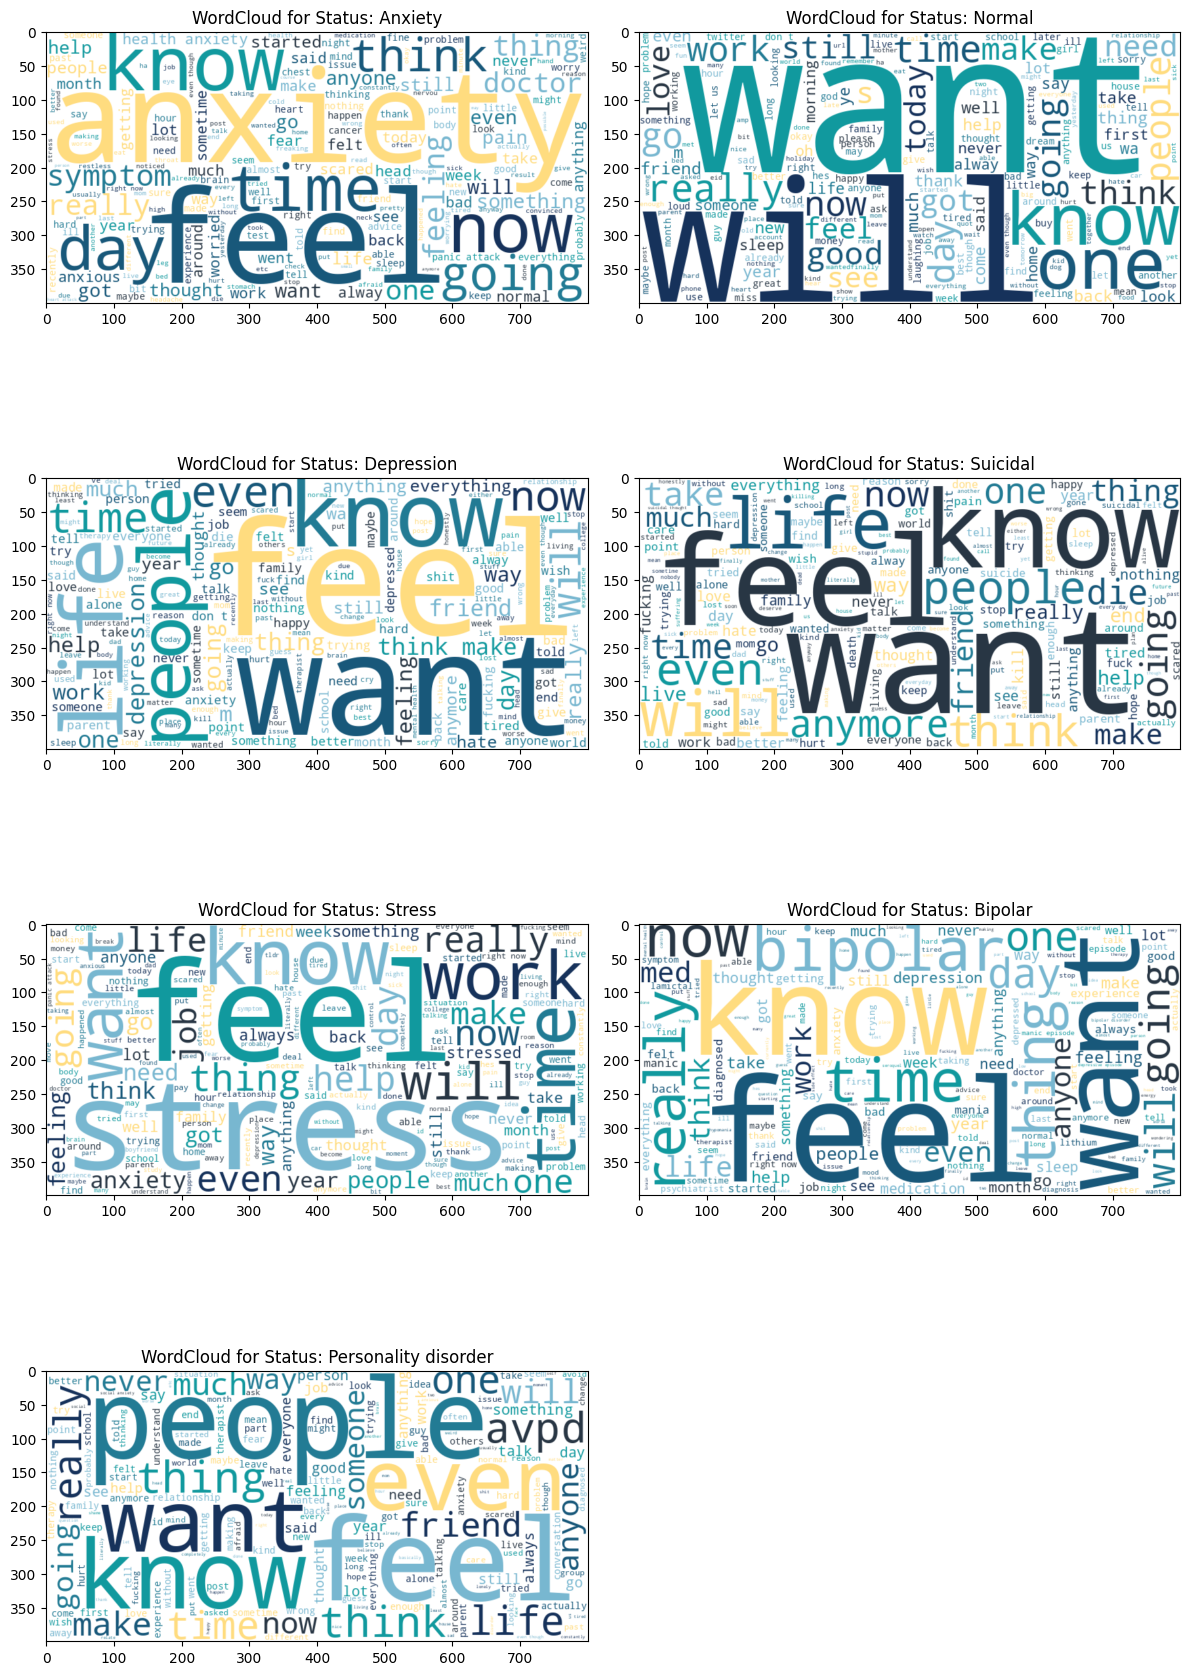

In [ ]:
statuses = df['status'].unique()

plt.figure(figsize=(12, 36))  # Adjust figure size as needed

# Generate and plot the WordCloud for each category
for i, status in enumerate(statuses):
    # Filter the tokens data for the current status
    tokens_data = ' '.join(df[df['status'] == status]['tokens'].dropna().apply(lambda x: ' '.join(x)).tolist())

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    # Plot the WordCloud in a subplot
    axes = plt.subplot(len(statuses) // 2 + 1, 2, i + 1)  # Adjust number of rows and columns dynamically
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for Status: {status}')
    #plt.axis('off')  # Turn off axes for a cleaner look

# Apply tight layout after generating all subplots
plt.tight_layout()

# Adjust the vertical spacing between subplots (hspace controls vertical space)
plt.subplots_adjust(hspace= -0.8)
plt.show()

---
```








```
---



## 3. Part-Of-Speach (POS) Tagging

### 3.1 Extract POS Taggs

##### Nlp

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: en (English):
| Processor | Package         |
-------------------------------
| tokenize  | combined        |
| mwt       | combined        |
| pos       | combined_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


#### define function to extract pos

In [ ]:
import nltk

def extract_pos_tokens(text, pos_tag_prefix):
    # Tokenize the input text
    tokens = nltk.word_tokenize(text)
    # Get the POS tags
    pos_tags = nltk.pos_tag(tokens)

    # Extract tokens based on POS tag prefix
    tokens_filtered = [word for word, pos in pos_tags if pos.startswith(pos_tag_prefix)]

    return ' '.join(tokens_filtered)

#### Extract Verbs

In [ ]:
df['tokens_verbs'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'V'))

#### Extract Nouns

In [ ]:
df['tokens_nouns'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'N'))

#### Extrac Adjectives

In [ ]:
df['tokens_adj'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'J'))

#### Sample

In [ ]:
df.sample(2)

,statement,status,statemnent_length,num_of_words,num_of_sentences,statement_with_emojis,tokens,tokens_stemmed,tokens_verbs,tokens_nouns,tokens_adj
3400,the first one still sucks if you continue the ...,Normal,59,11,1,the first one still sucks if you continue the ...,"[the, first, one, still, sucks, if, you, conti...",the first one still suck if you continu the pr...,sucks continue,plot,first previous
17428,i catch myself thinking and considering suicid...,Suicidal,437,91,8,i catch myself thinking and considering suicid...,"[i, catch, myself, thinking, and, considering,...",i catch myself think and consid suicid daili i...,catch thinking considering do think need walk ...,i i plan i river pills cabinet bit i i i anyth...,i suicide daily i scared suicidal i self


## 4. Dependency Parsing

###  Initialize Stanza pipelin

In [ ]:
# Initialize Stanza pipeline with dependency parsing
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma,depparse')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


### extract dependencies function

In [ ]:

# Function to extract dependency relations
def extract_dependencies(text):
    doc = nlp(text)
    dependencies = []
    for sentence in doc.sentences:
        for word in sentence.words:
            # Append the word, its dependency relation, and its head word
            dependencies.append((word.text, word.deprel, sentence.words[word.head - 1].text if word.head > 0 else "ROOT"))
    return dependencies


consume alot of memory
OutOfMemoryError                          Traceback (most recent call last)
/usr/local/lib/python3.10/dist-packages/stanza/pipeline/depparse_processor.py in process(self, document)
     64                 for i, b in enumerate(batch):
---> 65                     preds += self.trainer.predict(b)
     66             if batch.data_orig_idx is not None:

22 frames
OutOfMemoryError: CUDA out of memory. Tried to allocate 12.35 GiB. GPU 0 has a total capacity of 14.75 GiB of which 12.09 GiB is free. Process 4177 has 2.65 GiB memory in use. Of the allocated memory 1.90 GiB is allocated by PyTorch, and 634.24 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)


In [ ]:
# def extract_important_words(text):
#     doc = nlp(text)
#     important_words = []

#     for sentence in doc.sentences:
#         for word in sentence.words:
#             # Select words based on dependency relation
#             if word.deprel in {'root', 'nsubj', 'dobj', 'amod', 'advmod'}:
#                 important_words.append(word.text)

#     return ' '.join(important_words)


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')


In [ ]:

def extract_important_words(text):
    doc = nlp(text)
    important_words = set()  # Use a set to store unique words

    for token in doc:
        # Extract the head word if it has relevant dependency relations
        if token.dep_ in {'nsubj', 'dobj', 'amod', 'advmod', 'pobj', 'ROOT'}:
            important_words.add(token.text)  # Add the current token
            important_words.add(token.head.text)  # Add the head word

            # Include the children of the head word for additional context
            for child in token.head.children:
                important_words.add(child.text)

    return ' '.join(important_words)

### Applying dep parse

In [ ]:
# Apply the function to extract important words
df['important_words'] = df['statement'].apply(extract_important_words)


### result

In [ ]:
# Sample output
df[['important_words','statement']].sample(3)


,important_words,statement
38152,don time general all what with connect last wh...,i don t remember the last time i wa really abl...
20394,god 17 to it killed and kind should am so ever...,so this might be kind of long but here gose i ...
44553,snowing tennessee it too in is,it is snowing in tennessee too


# Saving DAtaset work

In [ ]:
df.to_csv(data_nlped_path , index=0)